In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Module 3: Beyond diversification - Insurance strategies
---

# 1. Limits of diversification
A good understanding of the limits of diversification will serve as an incentive for us to look beyond diversification, to talk about hedging and eventually, to move into insurance, which is extremely useful form of risk management. 

Diversification allows you to most efficiently harvest this premium by eliminating unrewarded risks, specific risks in investors portfolios.
By squeezing out everything that's unrewarded from your portfolio, you get a portfolio that does a good job at generating the highest possible reward per unit of risk. It's okay to hold risk if it is rewarded.
This strategy works on average across market conditions, but that doesn't work when you need it the most, which is a well-documented limit of diversification. Why diversification fail when there is a market crash? Because correlation between asset raises as the market drops.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",family="serif")
plt.rc("font",size=15)

Let's create a Cap-Weighted Portfolio.

In [3]:
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    ind = pd.read_csv("Data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m")
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_nfirms():
    """
    Load and format the Ken French 30 Industry Portfolios Average number of Firms
    """
    ind = pd.read_csv("Data/ind30_m_nfirms.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m")
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_size():
    """
    Load and format the Ken French 30 Industry Portfolios Average size (market cap)
    """
    ind = pd.read_csv("Data/ind30_m_size.csv", header=0, index_col=0)
    ind.index = pd.to_datetime(ind.index, format="%Y%m")
    ind.columns = ind.columns.str.strip()
    return ind

In [4]:
ind_return = get_ind_returns()
ind_nfirms = get_ind_nfirms()
ind_size = get_ind_size()

In [5]:
ind_mktcap = ind_nfirms * ind_size

In [6]:
ind_mktcap

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07-01,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08-01,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09-01,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10-01,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11-01,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,655086.88,248864.40,246251.37,359322.24,34986.00,436335.51,291114.00,3101280.74,527004.08,18460.08,...,1194867.48,4823187.60,3246634.04,302188.62,702401.00,329067.65,2282934.94,428784.93,4930872.78,1432052.70
2018-09-01,650961.36,243994.20,232888.44,369482.88,33346.32,447087.81,305995.50,3233033.92,525412.88,19156.88,...,1229361.27,5069913.20,3562212.72,299831.35,720451.90,340645.57,2486473.99,442374.34,5037628.51,1473543.50
2018-10-01,638821.15,243073.92,242110.77,366408.00,32533.41,451597.38,309179.15,3288588.12,462370.35,17928.00,...,1250164.08,5043137.32,3546678.80,298376.14,727665.40,330246.60,2500872.76,453366.32,4930387.44,1488960.20
2018-11-01,644666.55,239183.23,261239.37,307688.02,30333.87,446944.29,277819.13,2990934.10,403502.22,13304.88,...,1237481.19,4559456.44,3258043.60,265650.12,656465.31,303814.75,2244299.82,445210.94,4583277.60,1399224.32


Now that we have the market caps for each month, we can compute the total market capitalization over time by summing over all industries:

In [7]:
total_mktcap = ind_mktcap.sum(axis=1)

Now we can find the market cap for each industry at each month:

In [8]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")

In [9]:
ind_capweight.sum(axis = 1)

1926-07-01    1.0
1926-08-01    1.0
1926-09-01    1.0
1926-10-01    1.0
1926-11-01    1.0
             ... 
2018-08-01    1.0
2018-09-01    1.0
2018-10-01    1.0
2018-11-01    1.0
2018-12-01    1.0
Length: 1110, dtype: float64

Finally we can create a portfolio in which the weights assigned to each asset is equal to the market cap.

In [10]:
total_market_return = (ind_capweight * ind_return).sum(axis="columns")

In [11]:
def get_total_market_index_returns():
    """
    Load the 30 industry portfolio data and derive the returns of a capweighted total market index
    """
    ind_nfirms = get_ind_nfirms()
    ind_size = get_ind_size()
    ind_return = get_ind_returns()
    ind_mktcap = ind_nfirms * ind_size
    total_mktcap = ind_mktcap.sum(axis=1)
    ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
    total_market_return = (ind_capweight * ind_return).sum(axis="columns")
    return total_market_return

In [12]:
total_market_index = (1 + total_market_return).cumprod()

## Rolling Windows

Let's construct a rolling window of returns over a trailing 36 month period. Pandas contains direct support for rolling windows, and allows you to aggregate the returns over a window. In our case, lets compute the average return over a trailing 36 month window.

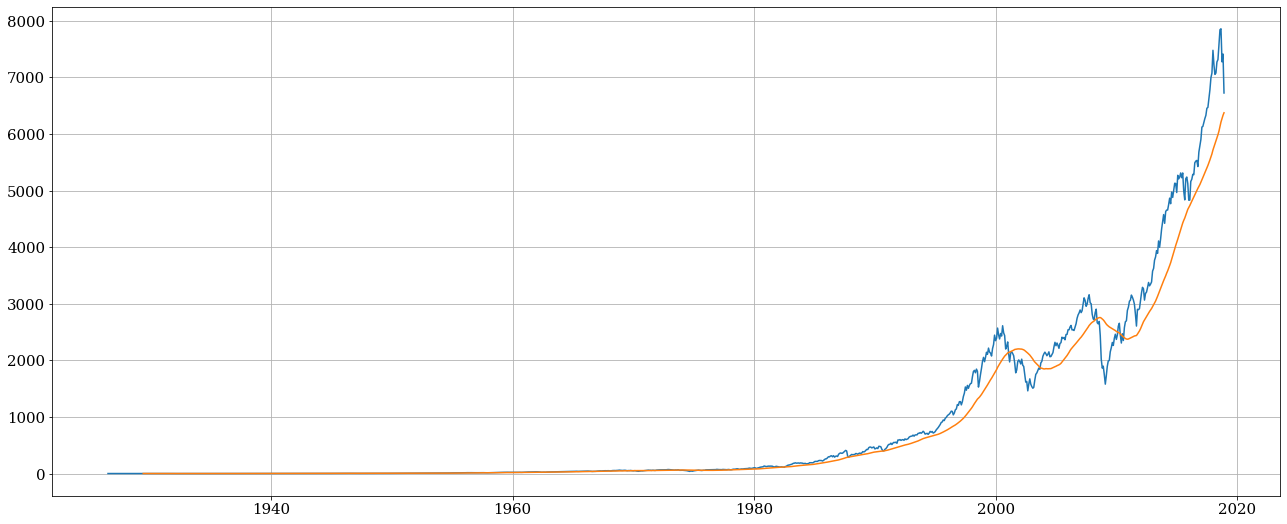

In [13]:
plt.figure(figsize= (22,9))
plt.plot(total_market_index)
plt.plot(total_market_index.rolling(window=36).mean())
plt.grid()

We dont really want the mean return, we want to look at the trailing 3 year compounded return.

In [14]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

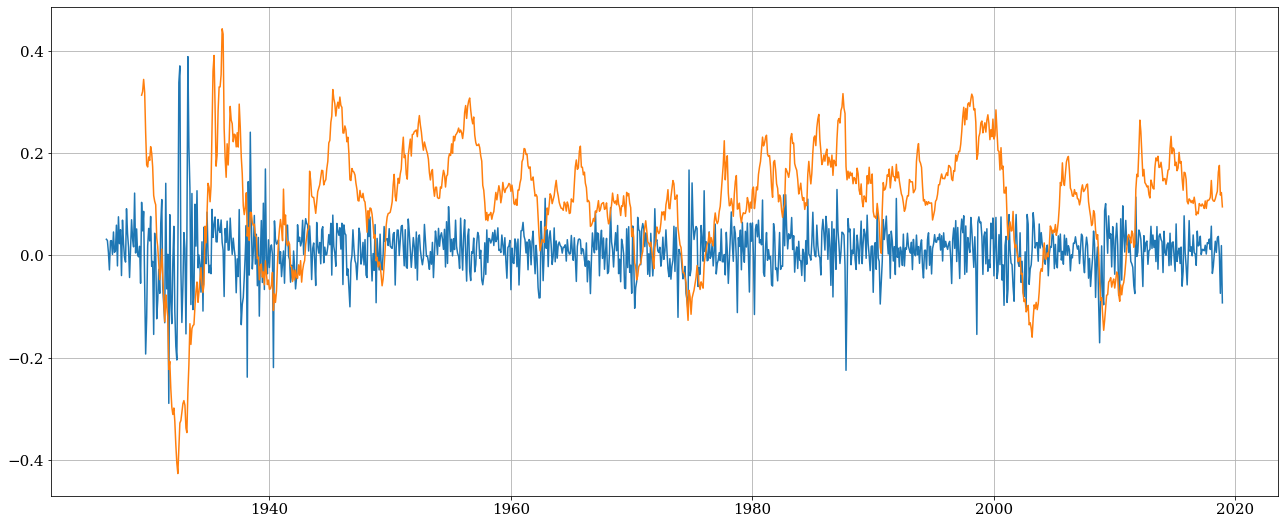

In [15]:
plt.figure(figsize= (22,9))
plt.plot(total_market_return)
plt.plot(total_market_return.rolling(window=36).aggregate(annualize_rets, periods_per_year=12))
plt.grid()

## Rolling Correlations: Multi Indexes and `.groupby`

Next we want to look at average correlations between all the industries over that same trailing 3 year window.

Let's start by contructing the time series of correlations over time over a 36 month window.

In [16]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12-01 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
           Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
           Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
           Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
           Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12-01 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
           Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
           Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
           Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
           Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12-01 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
           Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
           Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
           Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
           Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
2018-12-01 Whlsl  0.643879  0.746480  0.767652  
           Rtail  0.616947  0.611883  0.619918  
           Meals  1.000000  0.502563  0.605226  
           Fin    0.502563  1.000000  0.734837  
           Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [17]:
ts_corr.index.names = ['date', 'industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books  \
date       industry                                                     
2018-12-01 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362   
           Rtail     0.517856  0.406107  0.030283  0.676464  0.636320   
           Meals     0.370187  0.385483  0.122007  0.301516  0.520649   
           Fin       0.298823  0.192706  0.027593  0.480276  0.694812   
           Other     0.436952  0.376565  0.224010  0.331829  0.558072   

                        Hshld     Clths      Hlth     Chems     Txtls  ...  \
date       industry                                                    ...   
2018-12-01 Whlsl     0.419280  0.570071  0.739764  0.785796  0.634197  ...   
           Rtail     0.358336  0.676598  0.714933  0.626034  0.634202  ...   
           Meals     0.308216  0.302176  0.416193  0.520023  0.491726  ...   
           Fin       0.162690  0.425899  0.658468  0.760151  0.577090  ...   
           Other     0.390610  0.467099  0.645035  0.712511  0.520953  ...   

                        Telcm     Servs     BusEq     Paper     Trans  \
date       industry                                                     
2018-12-01 Whlsl     0.648092  0.567395  0.543362  0.764252  0.829185   
           Rtail     0.562238  0.762616  0.628246  0.656510  0.630615   
           Meals     0.406184  0.444629  0.399438  0.627113  0.663358   
           Fin       0.420863  0.585418  0.517947  0.670936  0.760730   
           Other     0.607868  0.460322  0.434487  0.773798  0.756961   

                        Whlsl     Rtail     Meals       Fin     Other  
date       industry                                                    
2018-12-01 Whlsl     1.000000  0.744842  0.643879  0.746480  0.767652  
           Rtail     0.744842  1.000000  0.616947  0.611883  0.619918  
           Meals     0.643879  0.616947  1.000000  0.502563  0.605226  
           Fin       0.746480  0.611883  0.502563  1.000000  0.734837  
           Other     0.767652  0.619918  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [18]:
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda corrmat: corrmat.values.mean())

In [19]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(annualize_rets, periods_per_year=12)

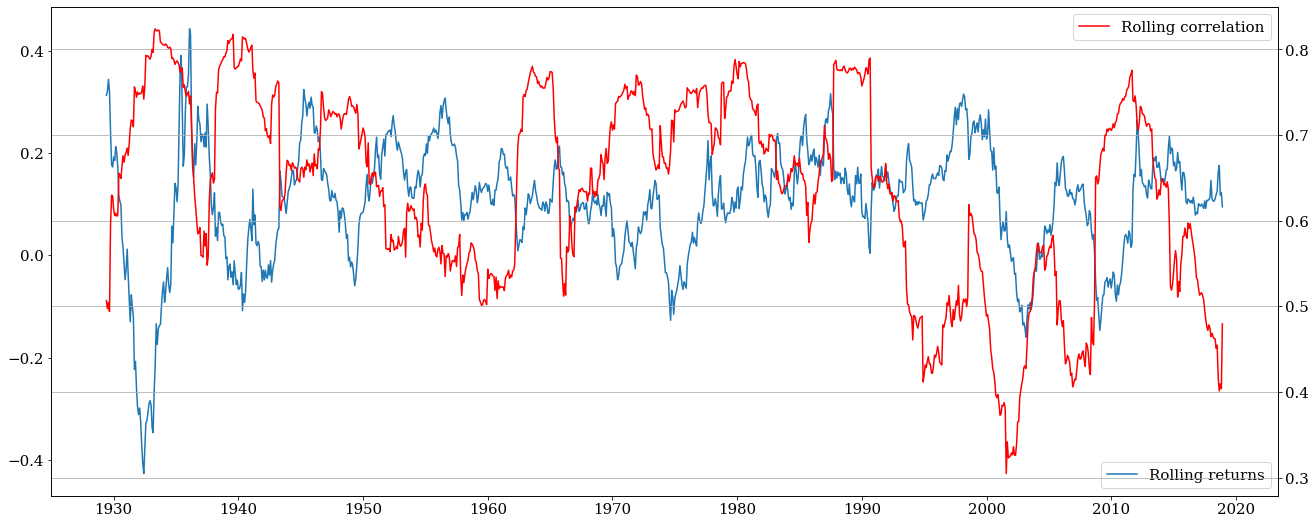

In [20]:
fig,ax = plt.subplots(figsize= (22,9))
ax.plot(tmi_tr36rets, label = 'Rolling returns')
plt.legend(loc = 'lower right')
ax2 = ax.twinx()
ax2.plot(ind_tr36corr, color = 'red', label = 'Rolling correlation')
plt.legend(loc = 'upper right')
plt.grid()

In [21]:
tmi_tr36rets.corr(ind_tr36corr)

-0.28010065062884115

Clearly, these two series are negatively correlated, which explains why diversification fails you when you need it most. When markets fall, correlations rise, making diversification much less valuable.

Instead, we'll look at how to use **insurance** to protect the downside.

# 2. Constant Proportion Portfolio Insurance (CPPI)

Constant Proportion Portfolio Insurance (CPPI) is a type of portfolio insurance in which the investor sets a floor on the dollar value of their portfolio, then structures asset allocation around that decision. The two asset classes used in CPPI are a risky asset (usually equities or mutual funds) and a conservative asset of either cash, equivalents or treasury bonds. The percentage allocated to each depends on the "cushion" value, defined as current portfolio value minus floor value, and a multiplier coefficient, where a higher number denotes a more aggressive strategy. 

Constant Proportion Portfolio Insurance (CPPI) allows an investor to maintain exposure to the upside potential of a risky asset while providing a capital guarantee against downside risk. The outcome of the CPPI strategy is somewhat similar to that of buying a call option, but does not use option contracts. Thus, CPPI is sometimes referred to as a convex strategy. Financial institutions sell CPPI products on a variety of risky assets, including equities and credit default swaps. 

### How does it work?
The idea is to allocate to the risky asset a multiple **M** of the difference of your asset value and a given floor which is called the **cushion**.

$$Cushion(C) = CPPI - Floor(F)$$
$$Risky_{asset} = M \times C$$
$$Save_{asset} = CPPI - Risky_{asset}$$

###  Example of CPPI

Consider a hypothetical portfolio of $\$$100,000, of which the investor decides $\$$90,000 is the absolute floor.  If one decides that 20 percent is the maximum "crash" possibility, the multiplier value will be (1/0.20), or 5. The investor would then allocate 5 x ($\$$100,000 - $\$$90,000) = $\$$50,000 to the risky asset, with the remainder going into cash or the conservative asset. As the value of the portfolio changes, the allocation between the risky and save asset will change as well.

### CPI algorithm
The CPPI algorithm is surprisingly simple to implement. This takes as input: the returns of a risky asset and a safe asset, the initial wealth to invest at the start and a floor that should not be violated.

In [22]:
total_market_return.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [23]:
risky_r = ind_return["2000":][["Steel", "Fin", "Beer"]]

# Assume the safe asset is paying 3% per year
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r.values[:] = 0.03/12 
start = 1000 # start at $1000
floor = 0.80 # set the floor to 80 percent of the starting value

Now, we need to backtest this strategy by starting at the beginning and at every point in time:

1. Compute the cushion (asset value minus floor)
2. Compute the allocation (based on the multiplier)
3. Compute the new asset value

In [24]:
# set up the CPPI parameters
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3

# set up some DataFrames for saving intermediate values
account_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)

In [25]:
for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1) #dont go above 100%
    risky_w = np.maximum(risky_w, 0) #dont go short
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    # recompute the new account value at the end of this step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    # save the histories for analysis and plotting
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()

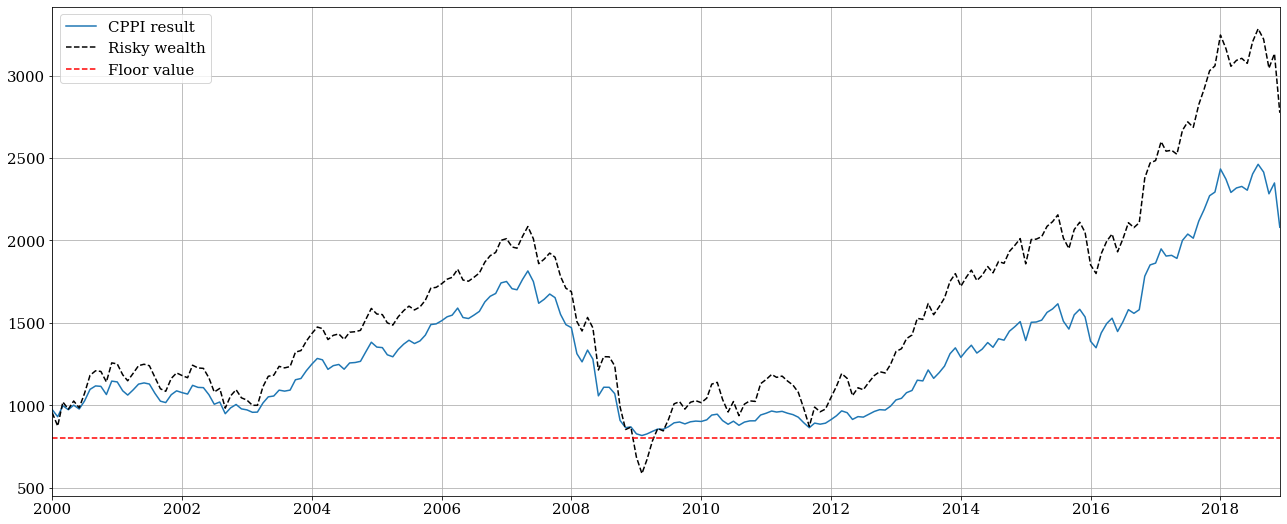

In [50]:
plt.figure(figsize = (22,9))
plt.plot(account_history['Fin'], label = 'CPPI result')
plt.plot(risky_wealth['Fin'], linestyle = 'dashed', color='k', label = 'Risky wealth')
plt.axhline(y=floor_value, color='r', linestyle='--', label = 'Floor value')
plt.grid()
plt.legend()
plt.autoscale(tight = True, axis = 'x')

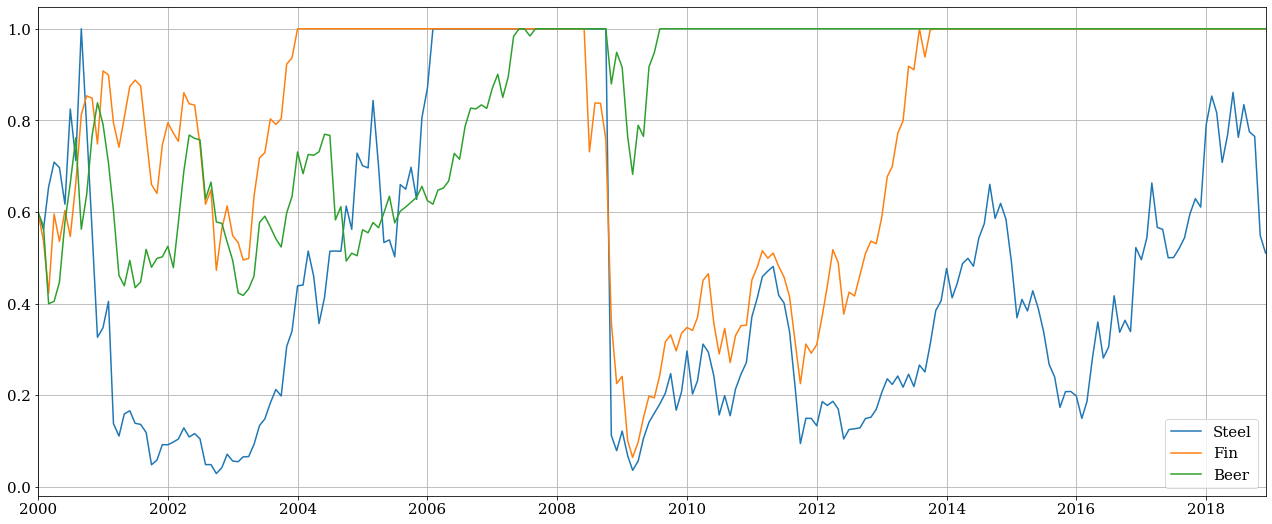

In [49]:
plt.figure(figsize = (22,9))
plt.plot(risky_w_history)
plt.grid()
plt.legend(risky_w_history.columns)
plt.autoscale(tight = True, axis = 'x')

Let's put all together in a funcion .

In [28]:
def run_cppi(risky_r, safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03):
    """
    Run a backtest of the CPPI strategy, given a set of returns for the risky asset
    Returns a dictionary containing: Asset Value History, Risk Budget History, Risky Weight History
    """
    # set up the CPPI parameters
    dates = risky_r.index
    n_steps = len(dates)
    account_value = start
    floor_value = start*floor

    if isinstance(risky_r, pd.Series): 
        risky_r = pd.DataFrame(risky_r, columns=["R"])

    if safe_r is None:
        safe_r = pd.DataFrame().reindex_like(risky_r)
        safe_r.values[:] = riskfree_rate/12 
    # set up some DataFrames for saving intermediate values
    account_history = pd.DataFrame().reindex_like(risky_r)
    risky_w_history = pd.DataFrame().reindex_like(risky_r)
    cushion_history = pd.DataFrame().reindex_like(risky_r)
    
    for step in range(n_steps):
        cushion = (account_value - floor_value)/account_value
        risky_w = m*cushion
        risky_w = np.minimum(risky_w, 1)
        risky_w = np.maximum(risky_w, 0)
        safe_w = 1-risky_w
        risky_alloc = account_value*risky_w
        safe_alloc = account_value*safe_w
        # recompute the new account value at the end of this step
        account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
        # save the histories for analysis and plotting
        cushion_history.iloc[step] = cushion
        risky_w_history.iloc[step] = risky_w
        account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()
    backtest_result = {
        "Wealth": account_history,
        "Risky Wealth": risky_wealth, 
        "Risk Budget": cushion_history,
        "Risky Allocation": risky_w_history,
        "m": m,
        "start": start,
        "floor": floor,
        "risky_r":risky_r,
        "safe_r": safe_r
    }
    return backtest_result

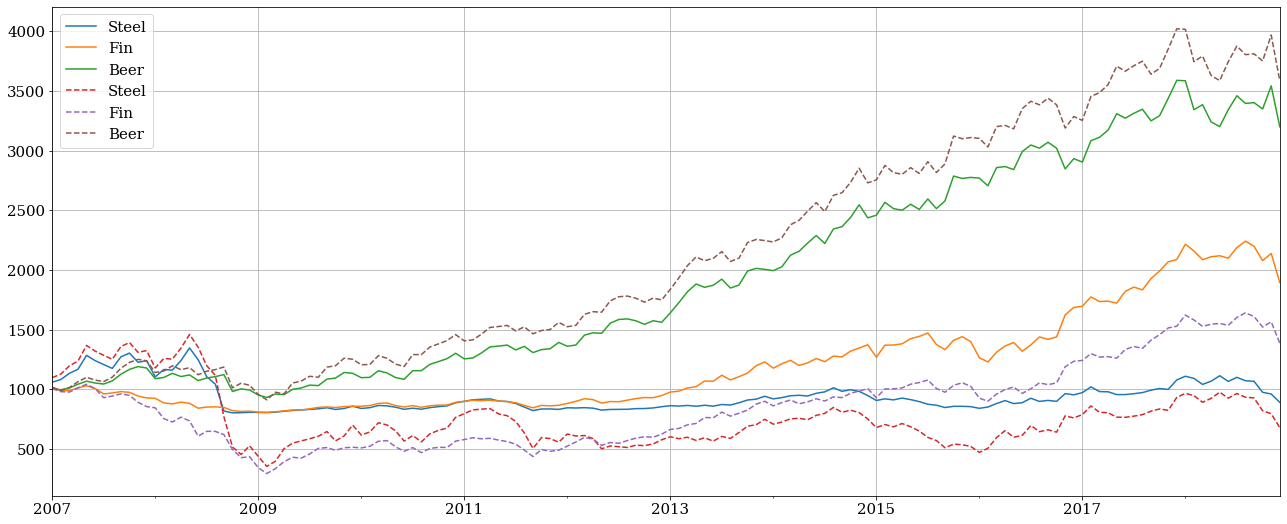

In [31]:
cppi = run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]])
ax = cppi["Wealth"].plot(figsize=(22,9))
cppi["Risky Wealth"].plot(ax=ax, style="--", grid=True)

Insurance strategies usually help with drawdowns, but they can also be adapted to explictly limit the drawdown.

## Explicitly Limiting Drawdowns

We can improve the CPPI algorithm by imposing a drawdown constraint. That is, a maximum drop that we are willing to experience. The only thing that chances is thet the floor value is not longer static, but instead changes over time as the peak of the account changes.
Modify the code to adjust the floor if needed, based on an additional new parameter `drawdown`.

```python
        if drawdown is not None:
            peak = np.maximum(peak, account_value)
            floor_value = peak*(1-drawdown)
```

You can now call `run_cppi` with a parameter `drawdown`. For instance, to run CPPI and limit the drawdown to 25%

In [32]:
def run_cppi(risky_r, safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03, drawdown = None):
    """
    Run a backtest of the CPPI strategy, given a set of returns for the risky asset
    Returns a dictionary containing: Asset Value History, Risk Budget History, Risky Weight History
    """
    # set up the CPPI parameters
    dates = risky_r.index
    n_steps = len(dates)
    account_value = start
    floor_value = start*floor
    peak = start

            
    if isinstance(risky_r, pd.Series): 
        risky_r = pd.DataFrame(risky_r, columns=["R"])

    if safe_r is None:
        safe_r = pd.DataFrame().reindex_like(risky_r)
        safe_r.values[:] = riskfree_rate/12 
    # set up some DataFrames for saving intermediate values
    account_history = pd.DataFrame().reindex_like(risky_r)
    risky_w_history = pd.DataFrame().reindex_like(risky_r)
    cushion_history = pd.DataFrame().reindex_like(risky_r)
    
    for step in range(n_steps):
        if drawdown is not None:
            peak = np.maximum(peak, account_value)
            floor_value = peak*(1-drawdown)
        cushion = (account_value - floor_value)/account_value
        risky_w = m*cushion
        risky_w = np.minimum(risky_w, 1)
        risky_w = np.maximum(risky_w, 0)
        safe_w = 1-risky_w
        risky_alloc = account_value*risky_w
        safe_alloc = account_value*safe_w
        # recompute the new account value at the end of this step
        account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
        # save the histories for analysis and plotting
        cushion_history.iloc[step] = cushion
        risky_w_history.iloc[step] = risky_w
        account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()
    backtest_result = {
        "Wealth": account_history,
        "Risky Wealth": risky_wealth, 
        "Risk Budget": cushion_history,
        "Risky Allocation": risky_w_history,
        "m": m,
        "start": start,
        "floor": floor,
        "risky_r":risky_r,
        "safe_r": safe_r
    }
    return backtest_result

In [53]:
cppi_dd = run_cppi(ind_return["2007":][["Fin"]], drawdown = .25)

In [55]:
cppi_dd['floor']

0.8

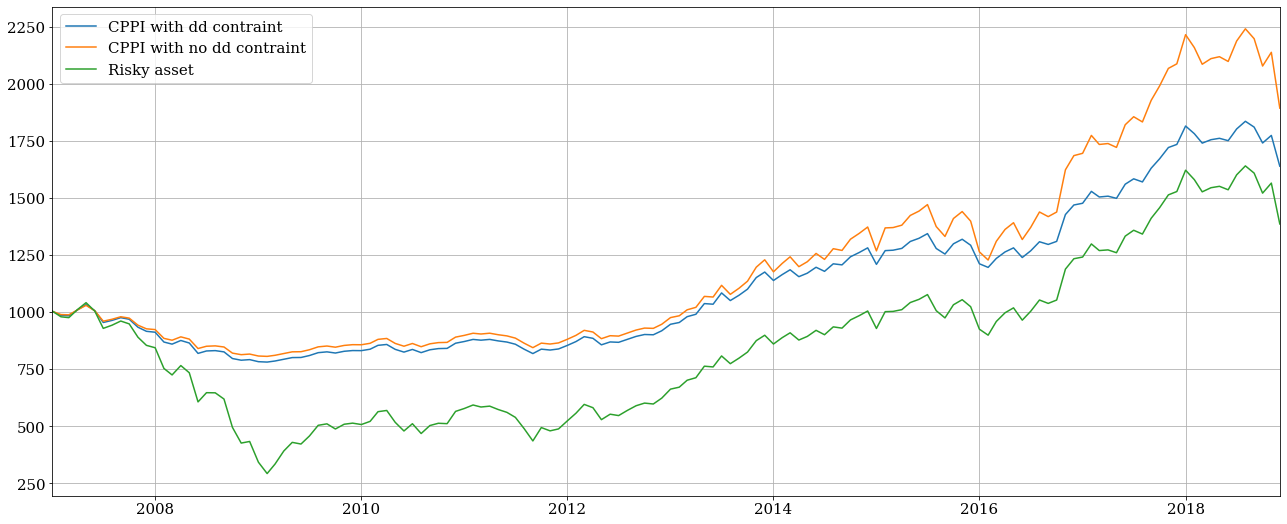

In [58]:
plt.figure(figsize=(22,9))
plt.plot(cppi_dd["Wealth"], label = 'CPPI with dd contraint')
plt.plot(cppi["Wealth"]['Fin'], label = 'CPPI with no dd contraint')
plt.plot(cppi["Risky Wealth"]['Fin'], label = 'Risky asset')
plt.grid()
plt.legend()
plt.autoscale(tight = True, axis = 'x')

CPPI is the basis for a lot of downside protection algorithms that are now finding their way into the marketplace. CPPI is just the core algorithm. There are always some sophisticated twists that are implemented alongside it.
For example, the reason we haven't had any violations here is because in this example in this back-test, we re-balancing every single month,
in reality you wouldn't do that.
CPPI is being used to do the same sort of things that principle protected product or a structured product used to do in the old days, but in a much simpler way. As transaction costs are getting lower, these kinds of algorithms are finding their way into retail accounts.

# 3. A first stochastic model for asset returns

A very convinient way to test these strategies is to perform Montecarlo simulations. In order to do that, we need to define a fairly reasonable setting for the evolution of the assets. 

We will start with a simple random walk model in continous time. Let $S_t$ be the price of the risky asset, $\mu$ its unconditional mean value, $\sigma$ its standard deviation and let $W_t$ be a Brownian Motion, we can define the following model for the risky asset:

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

or if we express it in terms of returns:
$$\frac{dS_t}{S_t} = \mu dt + \sigma dW_t$$


What this is telling us is that the change in the return of the risky asset over an infinitesimal period of time ($dt$) has two components:

- The first one, the drift, is based on the expected return of the asset. It tells us how much the asset price will change on average.
- The second one, the stochastic component, tells us how the actual returns fluctuate around the expected value. It dependts on the path of a Brownian Motion.

To get a better insight into the variations of returns, we can further decompose the expected return, $\mu$, in two components: the risk free rate plus a **risk premia**:

$$\mu = (r + \sigma \lambda)$$
In which $\lambda$ the Sharpe Ratio.

We can also define a model for the risk free asset as:

$$dB_t = B_t r dt$$

This is a non stochastic differential equation that can be solved as:

$$B_t = B_0e^{rt}$$

Note thet we are assuming that the risk free rate, the Sharpe ratio, the mean and the volatility are fixed parameters. These assumption can be relaxed for a more realistic model.

### Brownian motion 

A Brownian motion is a continuous-time stochastic processes, which is named after the botanist Robert Brown who studied the random drifting of particles suspended in a ﬂuid. In mathematics, the Brownian motion is described by the Wiener process; a continuous-time stochastic process named in honor of Norbert Wiener (this is why we represent it with a $W_t$.

The process $W = (W_t : t \geq 0)$ is a Brownian motion if and only if:

1. $W_0 = 0$ and $W_t$ is almost surely continuous.
2. Given $t_1 < t_2 < t_3 < t_4$, the increments $W_{t_4} − W_{t_3}$ and $W_{t_2} − W_{t_1}$ are independent random variables.
3. Given $0 < s < t$,  the increments $W_t − W_s \sim N(0, \sqrt{t − s})$

A Brownian motion is nothing more than a random walk in which we infinitely accelerate time.


### Discrete time formulation

$$\frac{S_{t+dt} - S_t}{S_t} = \mu dt + \sigma \sqrt{dt} \xi_t$$

In which the increment of the Brownian motion $dW_t = \sqrt{dt}\xi$, being $\xi$ a standard normal variable.

In [146]:
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0, price = True):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    Return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step model parameters from user specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    # start with just the returns, biased by mu_dt plus 1 since we'll need that later
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    rets.iloc[0] = 0
    prices = s_0*(1+rets).cumprod()
    return prices if price else rets

In [147]:
simulations = gbm(n_years=2, n_scenarios=30, steps_per_year=252, mu=0.07)

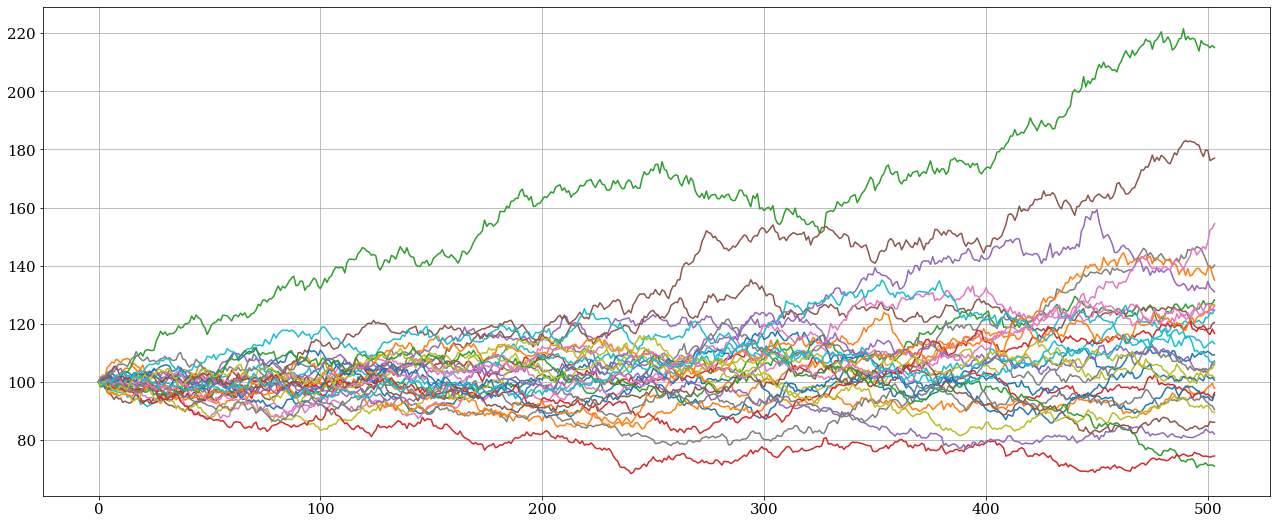

In [148]:
plt.figure(figsize = (22,9))
plt.plot(simulations)
plt.grid()

We can do it in a more efficient way by avoiding loops:

```python
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) + 1
    rets_plus_1 = np.random.normal(loc=(mu*dt+1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices ```

## Playing around with Ipywidgets

A nice way to understand the impact of parameters in a model is to see it graphically. Ipywidgets is a very useful tool to do that.

In [150]:
import ipywidgets as widgets
from IPython.display import display

In [151]:
def plot_gbm(n_scenarios, mu, sigma, n_years, steps_per_year):
    simulations = gbm(n_years=n_years, n_scenarios= n_scenarios, mu=mu, sigma=sigma, steps_per_year=steps_per_year, s_0=100)
    plt.figure(figsize = (22,9))
    plt.plot(simulations, color = 'lightseagreen', alpha = .5)
    plt.grid()
    plt.autoscale(tight = True, axis = 'x')
    return plt.show()

In [152]:
simulations = widgets.interactive(plot_gbm,
                    n_scenarios = (1,200,5), 
                    n_years = (1,5,1),
                    steps_per_year = (12, 252, 2),
                    mu = (0.01, 0.3, 0.02), 
                    sigma = (0.01, 0.3, 0.02)
            )

In [153]:
display(simulations)

interactive(children=(IntSlider(value=96, description='n_scenarios', max=200, min=1, step=5), FloatSlider(valu…

# 4. Interactive CPPI Monte Carlo Testing

Let's use Ipywidgtet to study the CPPI strategy. We can compute some statistics about the final wealth and the violations (that is, if the final wealth is less than the floor value).

In [192]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, price=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    # calculate terminal wealth stats

    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(22, 9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="tab:red")
    wealth_ax.grid()
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.grid()
    hist_ax.axhline(y=tw_mean, ls=":", color="tab:blue")
    hist_ax.axhline(y=tw_median, ls=":", color="tab:purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.65, .9),xycoords='axes fraction', fontsize=18)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.65, .85),xycoords='axes fraction', fontsize=18)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="tab:red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.65, .7), xycoords='axes fraction', fontsize=18)


In [193]:
cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=(1, 1000, 5), 
                                   mu=(0., 0.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0, 1, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01))

display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…